In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier 
from mlxtend.plotting import plot_decision_regions

sns.set()

In [2]:
#read the csv file into a Pandas data frame
df_census = pd.read_csv('census1994.csv')

df_census = df_census.rename(columns={'native-country': 'native_country'})
df_census = df_census.rename(columns={'education-num': 'education_num'})
df_census = df_census.rename(columns={'hours-per-week': 'hours_per_week'})

df_census = df_census[(df_census.WorkClass != ' ?') & (df_census.occupation != ' ?') & (df_census.native_country != ' ?')]

In [3]:
#return the first 5 rows of the dataset
df_census.head()

,Date,Age,WorkClass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours_per_week,native_country,class
0,3/20/1994,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1/14/1994,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,8/14/1994,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3/17/1994,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,9/20/1994,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#return the first 5 rows of the dataset
df_census.tail()

,Date,Age,WorkClass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours_per_week,native_country,class
32556,12/29/1994,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,1/30/1994,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,9/26/1994,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,4/5/1994,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,3/5/1994,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
print(df_census['class'].unique())

[' <=50K' ' >50K']


In [6]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
df_census['Date'] = le.fit_transform(df_census['Date'])
df_census['WorkClass'] = le.fit_transform(df_census['WorkClass'])
df_census['education'] = le.fit_transform(df_census['education'])
df_census['marital-status'] = le.fit_transform(df_census['marital-status'])
df_census['occupation'] = le.fit_transform(df_census['occupation'])
df_census['relationship'] = le.fit_transform(df_census['relationship'])
df_census['race'] = le.fit_transform(df_census['race'])
df_census['gender'] = le.fit_transform(df_census['gender'])
df_census['native_country'] = le.fit_transform(df_census['native_country'])
df_census['class'] = le.fit_transform(df_census['class'])

In [7]:
#Normalization
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_census)
df_census = pd.DataFrame(np_scaled, columns = df_census.columns)

In [8]:
X = df_census.iloc[:,0:15]  #independent columns
y = df_census.iloc[:,-1]    #target column i.e price range

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(xTrain,yTrain)
dfscores = pd.DataFrame(fit.scores_).astype('int64') 
dfcolumns = pd.DataFrame(xTrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

             Specs  Score
11    capital-gain    543
8     relationship    492
10          gender    321
12    capital-loss    224
1              Age    141
6   marital-status    113
5    education_num    112
13  hours_per_week     38
4        education     11
7       occupation     11
9             race      4
0             Date      0
2        WorkClass      0
3           fnlwgt      0
14  native_country      0


In [10]:
xTrain = xTrain[['capital-gain','relationship']] #independent columns
xTest = xTest[['capital-gain','relationship']]

In [11]:
k_range  = range(1,20)
scores = {}
scores_list = []
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(xTrain,yTrain)
    y_pred = knn.predict(xTest)
    scores[k]= metrics.accuracy_score(yTest,y_pred)
    scores_list.append(metrics.accuracy_score(yTest,y_pred))

Text(0, 0.5, 'Testing Accuracy')

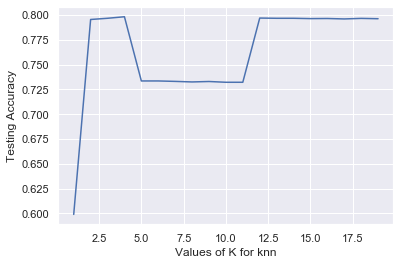

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list)
plt.xlabel('Values of K for knn')
plt.ylabel('Testing Accuracy')

In [13]:
knn1 = KNeighborsClassifier(n_neighbors=4,metric='euclidean')
#Train the algorithm
knn1.fit(xTrain, yTrain)
# predict the response
y_pred = knn1.predict(xTest)
print ("KNeighbors accuracy score : ",metrics.accuracy_score(yTest, y_pred))


KNeighbors accuracy score :  0.7980992374848049


In [14]:
knn2 = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
#Train the algorithm
knn2.fit(xTrain, yTrain)
# predict the response
y_pred = knn2.predict(xTest)
print ("KNeighbors accuracy score : ",metrics.accuracy_score(yTest, y_pred))


KNeighbors accuracy score :  0.599071720632114


In [15]:
knn3 = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
#Train the algorithm
knn3.fit(xTrain, yTrain)
# predict the response
y_pred = knn3.predict(xTest)
print ("KNeighbors accuracy score : ",metrics.accuracy_score(yTest, y_pred))


KNeighbors accuracy score :  0.7334512100784617


In [16]:
confusion_matrix(yTest, y_pred)


array([[4791, 1973],
       [ 439, 1846]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(yTest,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.71      0.80      6764
         1.0       0.48      0.81      0.60      2285

    accuracy                           0.73      9049
   macro avg       0.70      0.76      0.70      9049
weighted avg       0.81      0.73      0.75      9049



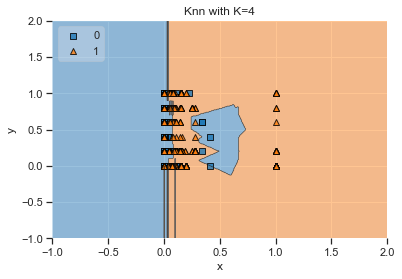

In [18]:
# Plotting decision region
plot_decision_regions(xTrain.values, yTrain.values.astype(np.int64), clf=knn1, legend=2)
# Adding axes annotations
plt.xlabel('x')
plt.ylabel('y')
plt.title('Knn with K='+ str(4))
plt.show()

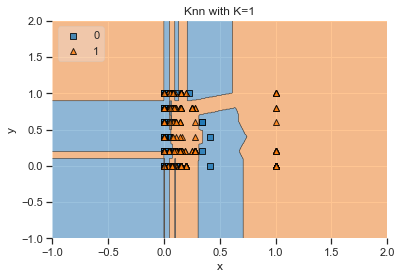

In [19]:
# Plotting decision region
plot_decision_regions(xTrain.values, yTrain.values.astype(np.int64), clf=knn2, legend=2)
# Adding axes annotations
plt.xlabel('x')
plt.ylabel('y')
plt.title('Knn with K='+ str(1))
plt.show()

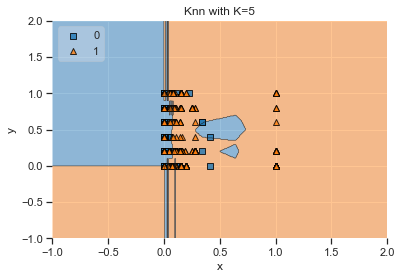

In [20]:
# Plotting decision region
plot_decision_regions(xTrain.values, yTrain.values.astype(np.int64), clf=knn3, legend=2)
# Adding axes annotations
plt.xlabel('x')
plt.ylabel('y')
plt.title('Knn with K='+ str(5))
plt.show()